# Noise experiments

In [8]:
import numpy as np
import mnist
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from components.gaussian import gaussian
from components.cnn_parallell import make_t_sne, experiment1, experiment2, experiment3, experiment4, experiment6
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from components.cnn_score import score_clfs_noisy


In [9]:
plt.rcParams["figure.figsize"] = (4,3)


In [10]:
train_imgs = mnist.train_images()/255.0
train_labels = mnist.train_labels()
test_imgs = mnist.test_images()/255.0
test_labels = mnist.test_labels()

data_train = train_imgs[:, 1:, 1:]
data_test = test_imgs[:, 1:, 1:]

In [11]:
noises = [.1, .2, .3, .4, .5]

noisy_test = [np.array([img + np.random.normal(.0, noise, size=(data_train[0].shape)) for img in data_test]) for noise in noises]
noisy_test_flattened = [data.reshape(data.shape[0], 27*27) for data in noisy_test]

train_flattened = data_train.reshape(data_train.shape[0], 27*27)

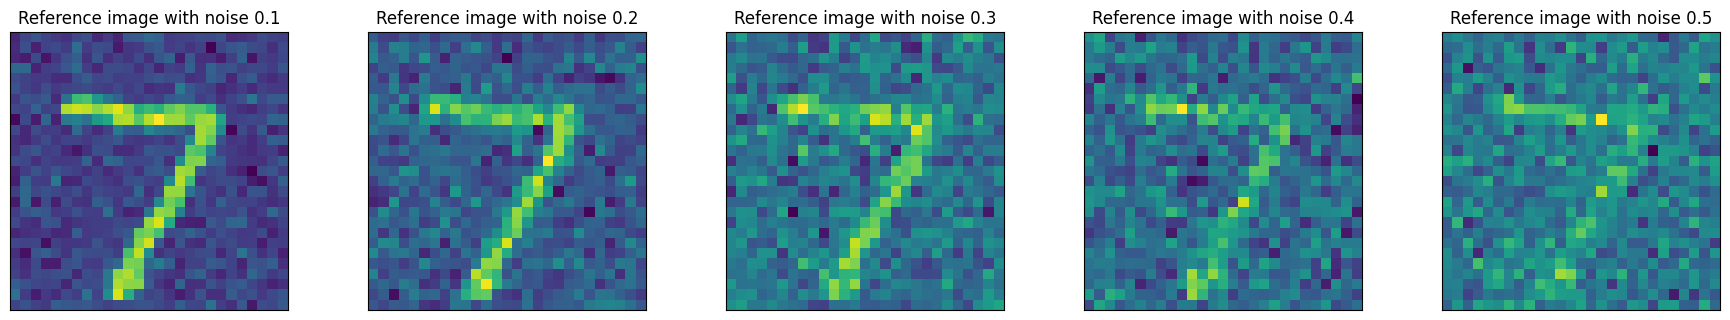

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(18, 3))
for i in range(5): 
    ax[i].imshow(noisy_test[i][0])
    ax[i].set_xticks(())
    ax[i].set_yticks(())
    ax[i].set_title(f"Reference image with noise {noises[i]}")
plt.tight_layout(pad=0.0)


## Comparing performance on noisy mnist

In [13]:
lr_best_tols = {
    "baseline": 0.01,
    "exp1": 0.001,
    "exp2": 0.001,
    "exp3": 0.0005,
    "exp4": 0.0005,
    "exp5": 0.001,
    "exp6": 0.005
}

scores_noisy_lr = []

### Logistic regression

#### Baseline - LR

In [14]:
clfs_bl = [LogisticRegression(fit_intercept=True,
                              multi_class='multinomial',
                              penalty='l2',
                              solver='saga',
                              max_iter=1000,
                              n_jobs=8,
                              tol=lr_best_tols["baseline"]) for _ in range(len(noises))]
baseline_lr_scores = score_clfs_noisy(clfs_bl, train_flattened, train_labels, noisy_test_flattened, test_labels)
scores_noisy_lr.append(baseline_lr_scores)
baseline_lr_scores

[0.915, 0.864, 0.7825, 0.6849, 0.6111]

Text(3.972222222222223, 0.5, 'Accuracy score')

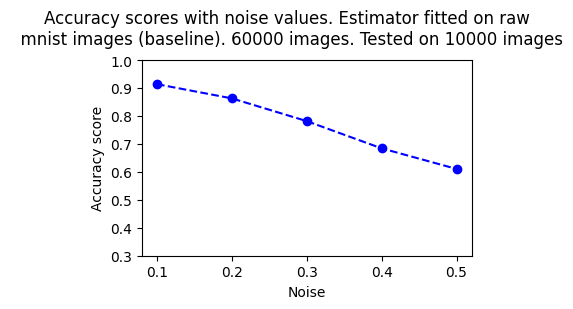

In [16]:
plt.plot([str(t) for t in noises], baseline_lr_scores, linestyle='--', marker='o', color='b', label='Accuracy score')
plt.tight_layout(rect=(0., 0.03, 1., 0.86))
plt.suptitle(f"Accuracy scores with noise values. Estimator fitted on raw\n  mnist images (baseline). {data_train.shape[0]} images. Tested on {data_test.shape[0]} images")
plt.ylim([.3, 1.])
plt.xlabel("Noise") 
plt.ylabel("Accuracy score") 

#### Experiment 1 - LR

In [17]:
exp_1_train_transformed = experiment1(data_train)
exp_1_test_transformed = [experiment1(test) for test in noisy_test]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [18]:
clfs_lr_ex1 = [LogisticRegression(fit_intercept=True,
                           multi_class='multinomial',
                           penalty='l2',
                           solver='saga',
                           max_iter=1000,
                           n_jobs=8,
                           tol=lr_best_tols["exp1"]) for _ in range(len(noises))]

lr_noisy_exp2_score = score_clfs_noisy(clfs_lr_ex1, exp_1_train_transformed, train_labels, exp_1_test_transformed, test_labels)                        
scores_noisy_lr.append(lr_noisy_exp2_score)
lr_noisy_exp2_score

[0.8955, 0.8683, 0.8028, 0.6999, 0.5633]

#### Experiment 2 - LR

In [19]:
exp_2_train_transformed = experiment2(data_train)
exp_2_test_transformed = [experiment2(test) for test in noisy_test]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [20]:
clfs_lr_ex2 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp2"]) for _ in range(len(noises))]

lr_noisy_exp2_score = score_clfs_noisy(clfs_lr_ex2, exp_2_train_transformed, train_labels, exp_2_test_transformed, test_labels)                        
scores_noisy_lr.append(lr_noisy_exp2_score)
lr_noisy_exp2_score

[0.7486, 0.6787, 0.5898, 0.478, 0.3759]

#### Experiment 3 - LR

In [21]:
scores_noisy_lr.append([0.0 for _ in range(len(noises))])

### Experiment 4 - LR

In [22]:
exp_4_train_transformed = experiment4(data_train)
exp_4_test_transformed = [experiment4(test) for test in noisy_test]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [23]:
clfs_lr_ex4 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp4"]) for _ in range(len(noises))]

lr_noisy_exp4_score = score_clfs_noisy(clfs_lr_ex4, exp_4_train_transformed, train_labels, exp_4_test_transformed, test_labels)
scores_noisy_lr.append(lr_noisy_exp4_score)
lr_noisy_exp4_score

[0.7897, 0.7347, 0.653, 0.5363, 0.4266]

### Experiment 5 - LR

In [24]:
exp_5_train_transformed = experiment4(data_train, length=4)
exp_5_test_transformed = [experiment4(test, length=4) for test in noisy_test]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [25]:
clfs_lr_ex5 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp5"]) for _ in range(len(noises))]

lr_noisy_exp5_score = score_clfs_noisy(clfs_lr_ex5, exp_5_train_transformed, train_labels, exp_5_test_transformed, test_labels)
scores_noisy_lr.append(lr_noisy_exp5_score)

### Experiment 6 - LR

In [26]:
exp_6_train_transformed = experiment6(data_train, threshhold=0.85)
exp_6_test_transformed = [experiment6(test, threshhold=0.85) for test in noisy_test]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [27]:
clfs_lr_ex6 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=lr_best_tols["exp6"]) for _ in range(len(noises))]

lr_noisy_exp6_score = score_clfs_noisy(clfs_lr_ex6, exp_6_train_transformed, train_labels, exp_6_test_transformed, test_labels)
scores_noisy_lr.append(lr_noisy_exp6_score)
lr_noisy_exp6_score

[0.9282, 0.9067, 0.8051, 0.5582, 0.3099]

In [28]:
from components.filter_bank import filter_bank
from components.hexagon_grid import hexagon_grid
import multiprocessing

def create_coefficients(data: np.ndarray, sig:float, center: np.ndarray, grid_scale: int):
    filters_real, _, filters_abs, theta_indices = filter_bank(27, sig, 2 * 4, 2)

    coefficients = np.full((data.shape[0], filters_real.shape[0]), -1., dtype=np.float32)

    radius = grid_scale / np.sqrt(3.)  # The radius of the circumscribed circle is 2/sqrt(3) * grid_scale/2
    for d1 in np.arange(-radius, radius + 1., 1.):
        for d2 in np.arange(-radius, radius + 1., 1.):
            d = np.array([d1, d2])
            if np.square(d).sum() <= np.square(radius + 0.15):  # +0.15 to avoid gaps
                rolled = np.roll(data, (center + d).astype(int), axis=(1, 2))
                for i in range(filters_real.shape[0]):
                    masked = rolled * filters_abs[i]
                    masked /= np.sqrt(np.sum(np.square(masked), axis=(1, 2))).reshape(-1, 1, 1)
                    coefficients[:, i] = np.maximum(coefficients[:, i], np.sum(masked * filters_real[i], axis=(1, 2)))

    return np.hstack((coefficients[:, theta_indices[0]].max(axis=1).reshape(-1, 1), coefficients[:, theta_indices[1]].max(axis=1).reshape(-1, 1),
                      coefficients[:, theta_indices[2]].max(axis=1).reshape(-1, 1), coefficients[:, theta_indices[3]].max(axis=1).reshape(-1, 1)))

def experiment7_2(X:np.ndarray, sig:float=20., grids: list[tuple[int, int]]=[(3, 3), (2, 5), (1, 7), (1, 9)]) -> np.ndarray:
    manifold = []

    with multiprocessing.Pool() as p:
        manifold += p.starmap(create_coefficients, [(X, sig, center, grid_scale) for grid_radius, grid_scale in grids for center in grid_scale * hexagon_grid(grid_radius)])

    manifold_reshaped = np.hstack([i for i in manifold])

    return manifold_reshaped

### Experiment 7 - LR

In [29]:
exp_7_train_transformed = experiment7_2(data_train)
exp_7_test_transformed = [experiment7_2(test) for test in noisy_test]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/st

In [30]:
clfs_lr_ex7 = [LogisticRegression(fit_intercept=True,
                                  multi_class='multinomial',
                                  penalty='l2',
                                  solver='saga',
                                  max_iter=1000,
                                  n_jobs=8,
                                  tol=0.001) for _ in range(len(noises))]

lr_noisy_exp7_score = score_clfs_noisy(clfs_lr_ex7, exp_7_train_transformed, train_labels, exp_7_test_transformed, test_labels)
scores_noisy_lr.append(lr_noisy_exp7_score)
lr_noisy_exp7_score

[0.933, 0.8832, 0.8353, 0.7629, 0.6705]

### Results from LR

Text(0.5, 0.98, 'Trained on MNIST with LR estimator, tested on noisy images. \nTrained on 60000 images. Tested on 10000 images')

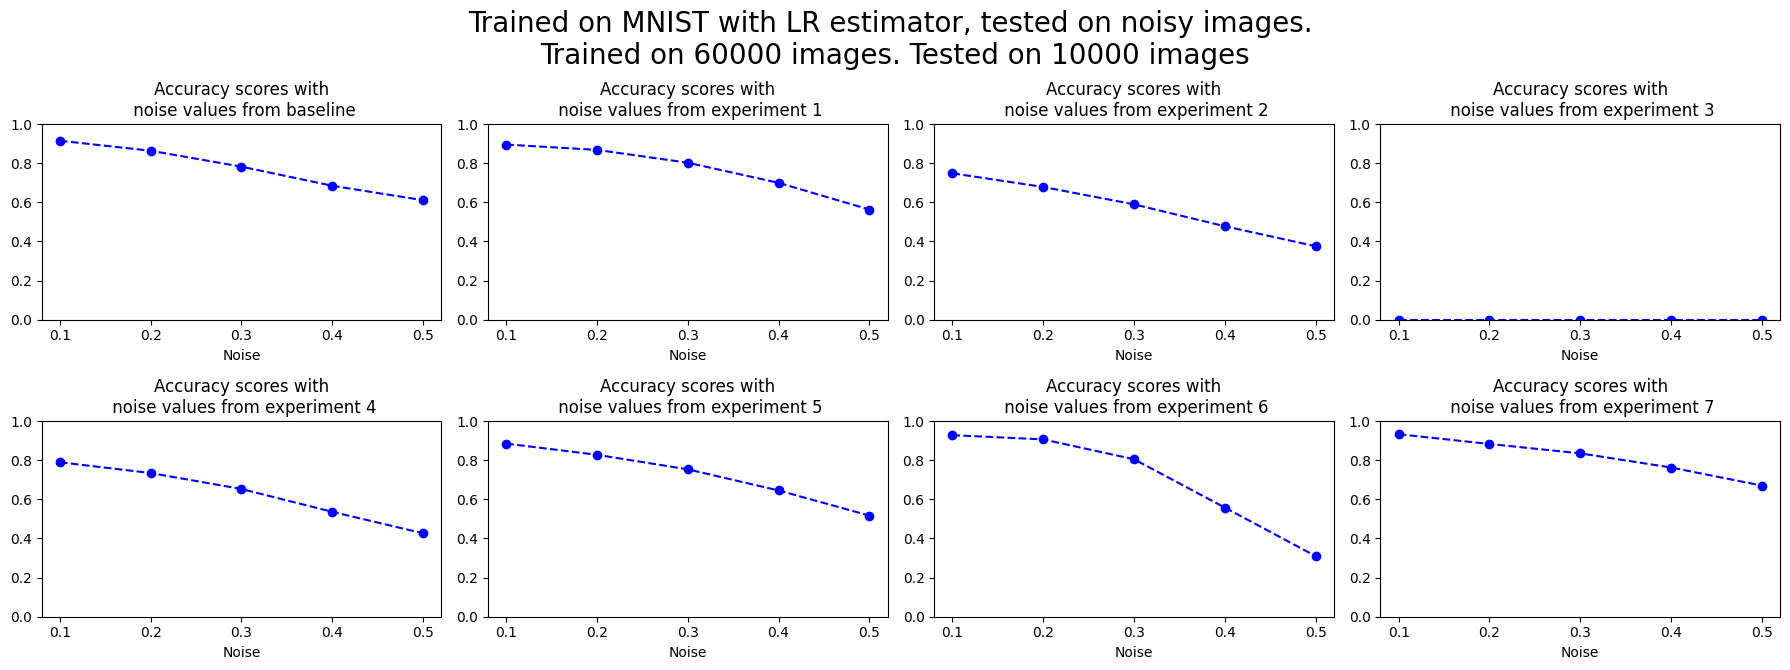

In [102]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(8):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in noises], scores_noisy_lr[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n noise values from experiment {i}" if i > 0 else "Accuracy scores with\n noise values from baseline")
    ax[k][j].set_ylim([.0, 1.])
    ax[k][j].set_xlabel("Noise") 
fig.tight_layout(rect=(0., 0.03, 1., 0.9))
fig.suptitle(f"Trained on MNIST with LR estimator, tested on noisy images. \nTrained on {data_train.shape[0]} images. Tested on {data_test.shape[0]} images",
             fontsize=20)
#fig.delaxes(ax[1,3])

### SVM

In [32]:
svm_best_Cs = {
    "baseline": 10.,
    "exp1": 500.,
    "exp2": 500.,
    "exp3": 500.,
    "exp4": 500.,
    "exp5": 500.,
    "exp6": 10.
}

scores_noisy_svm = []

#### Baseline - SVM

In [33]:
clfs_svm_bl = [SVC(kernel='rbf', C=svm_best_Cs["baseline"], gamma="auto") for _ in range(len(noises))]
baseline_svm_scores = score_clfs_noisy(clfs_svm_bl, train_flattened, train_labels, noisy_test_flattened, test_labels)
scores_noisy_svm.append(baseline_svm_scores)
baseline_svm_scores

[0.9615, 0.9477, 0.8996, 0.8081, 0.7028]

#### Experiment 1 - SVM

In [34]:
clfs_svm_exp1 = [SVC(kernel='rbf', C=svm_best_Cs["exp1"], gamma="auto") for _ in range(len(noises))]
scores_noisy_exp1_svm = score_clfs_noisy(clfs_svm_exp1, exp_1_train_transformed, train_labels, exp_1_test_transformed, test_labels)
scores_noisy_svm.append(scores_noisy_exp1_svm)
scores_noisy_exp1_svm

[0.9222, 0.8856, 0.8107, 0.6753, 0.5158]

#### Experiment 2 - SVM

In [35]:
clfs_svm_exp2 = [SVC(kernel='rbf', C=svm_best_Cs["exp2"], gamma="auto") for _ in range(len(noises))]
scores_noisy_exp2_svm = score_clfs_noisy(clfs_svm_exp2, exp_2_train_transformed, train_labels, exp_2_test_transformed, test_labels)
scores_noisy_svm.append(scores_noisy_exp2_svm)
scores_noisy_exp2_svm

[0.6647, 0.6021, 0.5019, 0.378, 0.2879]

#### Experiment 3 - SVM

In [36]:
""" clfs_svm_exp3 = [SVC(kernel='rbf', C=svm_best_Cs["exp3"], gamma="auto") for _ in range(len(noises))]
scores_noisy_svm.append(score_clfs_noisy(clfs_svm_exp3, dataset_exp3)) """
scores_noisy_svm.append([0.0 for _ in range(len(noises))])

#### Experiment 4 - SVM

In [37]:
clfs_svm_exp4 = [SVC(kernel='rbf', C=svm_best_Cs["exp4"], gamma="auto") for _ in range(len(noises))]
scores_noisy_exp4_svm = score_clfs_noisy(clfs_svm_exp4, exp_4_train_transformed, train_labels, exp_4_test_transformed, test_labels)
scores_noisy_svm.append(scores_noisy_exp4_svm)
scores_noisy_exp4_svm

[0.7194, 0.6445, 0.5425, 0.4201, 0.3219]

#### Experiment 5 - SVM

In [38]:
clfs_svm_exp5 = [SVC(kernel='rbf', C=svm_best_Cs["exp5"], gamma="auto") for _ in range(len(noises))]
scores_noisy_exp5_svm = score_clfs_noisy(clfs_svm_exp5, exp_5_train_transformed, train_labels, exp_5_test_transformed, test_labels)
scores_noisy_svm.append(scores_noisy_exp5_svm)

#### Experiment 6 - SVM

In [39]:
clfs_svm_exp6 = [SVC(kernel='rbf', C=svm_best_Cs["exp6"], gamma="auto") for _ in range(len(noises))]
scores_noisy_exp6_svm = score_clfs_noisy(clfs_svm_exp6, exp_6_train_transformed, train_labels, exp_6_test_transformed, test_labels)
scores_noisy_svm.append(scores_noisy_exp6_svm)
scores_noisy_exp6_svm

[0.9461, 0.9287, 0.838, 0.5989, 0.3432]

#### Experiment 7 - SVM

In [40]:
clfs_svm_exp7 = [SVC(kernel='rbf', C=500., gamma="auto") for _ in range(len(noises))]
scores_noisy_exp7_svm = score_clfs_noisy(clfs_svm_exp7, exp_7_train_transformed, train_labels, exp_7_test_transformed, test_labels)
scores_noisy_svm.append(scores_noisy_exp7_svm)
scores_noisy_exp7_svm

[0.9251, 0.8668, 0.7956, 0.6811, 0.5483]

### Results from SVM

Text(0.5, 0.98, 'Trained on MNIST with SVM estimator, tested on noisy images. \nTrained on 60000 images. Tested on 10000 images')

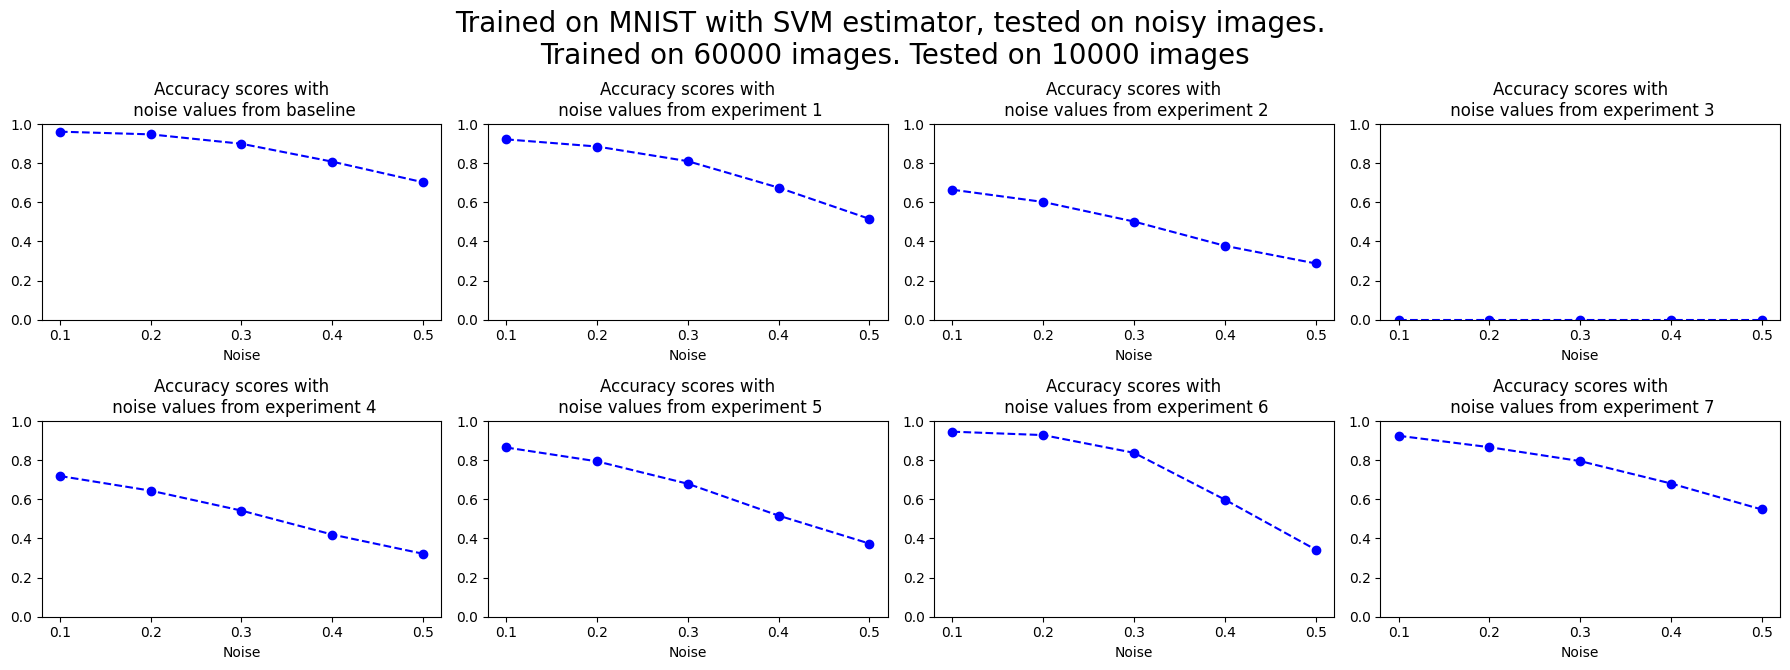

In [103]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(8):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in noises], scores_noisy_svm[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n noise values from experiment {i}" if i > 0 else "Accuracy scores with\n noise values from baseline")
    ax[k][j].set_ylim([.0, 1.])
    ax[k][j].set_xlabel("Noise") 
fig.tight_layout(rect=(0., 0.03, 1., 0.9))
fig.suptitle(f"Trained on MNIST with SVM estimator, tested on noisy images. \nTrained on {data_train.shape[0]} images. Tested on {data_test.shape[0]} images",
             fontsize=20)
#fig.delaxes(ax[1,3])

### Testing with CNN - Baseline

In [42]:
cnn_scores_noise = []

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

2024-04-27 13:24:17.608374: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 13:24:17.611454: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 13:24:17.649829: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 13:24:18.349345: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [44]:
mnist_train_pixelshape = [np.expand_dims(data, -1) for data in data_train]
mnist_test_pixelshape = [np.expand_dims(data, -1) for data in data_test]

input_shape = mnist_train_pixelshape[0].shape[-3:]
classes = np.unique(train_labels).shape[0]
train_labels_binary = keras.utils.to_categorical(train_labels, classes)
test_labels_binary = keras.utils.to_categorical(test_labels, classes)

In [93]:
def make_model_baseline(input_shape, num_classes):
    return keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

def add_noise(std, img, shape):
    noi = np.random.normal(.0, std, size=shape)
    return img + noi[..., np.newaxis]


def score_cnn(clfs, X_train, y_train, X_test, y_test):
    scores = []
    batch_size = 128
    epochs = 15
    X_tr = np.array(X_train)

    for i, clf in enumerate(clfs):
        X_te = np.array([add_noise(noises[i], img, (27, 27)) for img in X_test])
        clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        clf.fit(X_tr, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
        scores.append(clf.evaluate(X_te, y_test, verbose=0)[1])
    return scores

In [94]:
clfs_bl_cnn = [make_model_baseline(input_shape=input_shape, num_classes=classes) for _ in range(len(noises))]
cnn_scores_noise.append(score_cnn(clfs_bl_cnn, mnist_train_pixelshape, train_labels_binary, mnist_test_pixelshape, test_labels_binary))

Text(0.5, 1.0, 'CNN accuracy scores with noise values from baseline, LR')

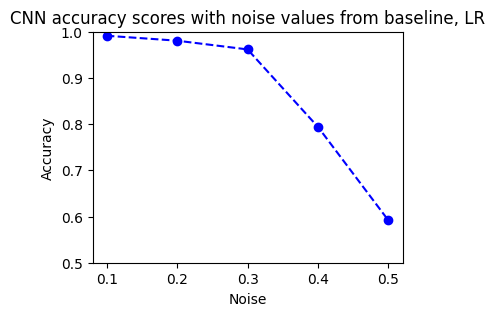

In [95]:
plt.plot([str(t) for t in noises], cnn_scores_noise[0], linestyle='--', marker='o', color='b', label='Accuracy score')
plt.ylim([.5, 1.])
plt.ylabel("Accuracy")
plt.xlabel("Noise")
plt.title("CNN accuracy scores with noise values from baseline, LR")


## Another type of noise: image blackouts

In [47]:
def black_out_section(image, size):
    offset = 28 - size
    start_row = np.random.randint(3, offset-3)
    start_col = np.random.randint(3, offset-3)
    image_copy = image.copy()
    image_copy[start_row:start_row+size, start_col:start_col+size] = 0
    return image_copy

blackout_sizes = np.arange(3, 18, 3)
blackout_tests = [np.array([black_out_section(img, size) for img in data_test]) for size in blackout_sizes]

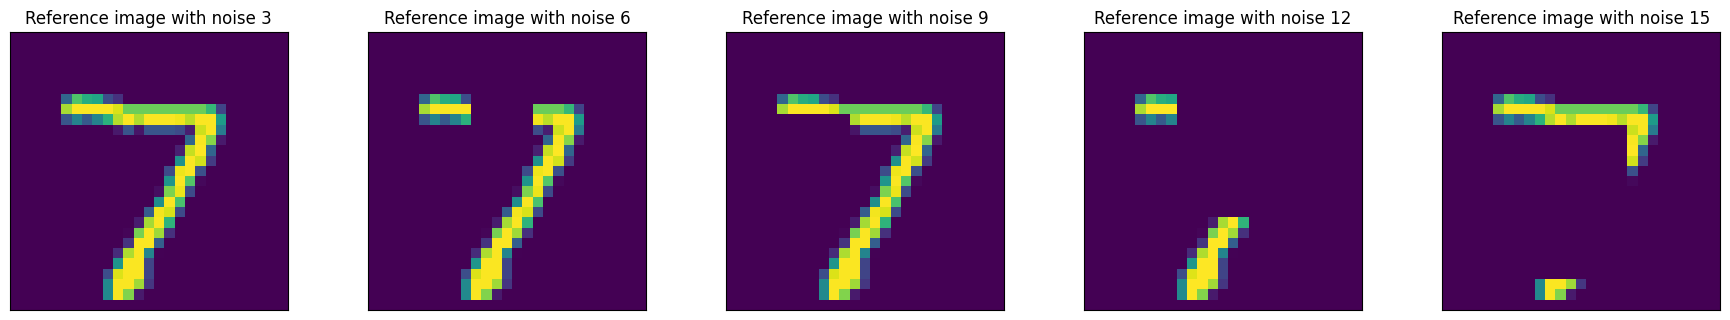

In [48]:
fig, ax = plt.subplots(1, 5, figsize=(18, 3))
for i in range(5): 
    ax[i].imshow(blackout_tests[i][0])
    ax[i].set_xticks(())
    ax[i].set_yticks(())
    ax[i].set_title(f"Reference image with noise {blackout_sizes[i]}")
plt.tight_layout(pad=0.0)

### LR

In [49]:
scores_blackout_lr = []

### Baseline

In [50]:
blackout_test_flattened = [data.reshape(data.shape[0], 27*27) for data in blackout_tests]

In [51]:

clfs_bl_lr = [LogisticRegression(fit_intercept=True,
                                 multi_class='multinomial',
                                 penalty='l2',
                                 solver='saga',
                                 max_iter=1000,
                                 n_jobs=8,
                                 tol=lr_best_tols["baseline"]) for _ in range(len(blackout_sizes))]

scores_blackout_baseline_lr = score_clfs_noisy(clfs_bl_lr, train_flattened, train_labels, blackout_test_flattened, test_labels)
scores_blackout_lr.append(scores_blackout_baseline_lr)
scores_blackout_baseline_lr

[0.9169, 0.8119, 0.5682, 0.3493, 0.2769]

#### Experiment 1

In [52]:
exp_1_test_blackout_transformed = [experiment1(test) for test in blackout_tests]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [53]:
clfs_lr_ex1_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp1"]) for _ in range(len(blackout_sizes))]

scores_blackout_exp1_lr = score_clfs_noisy(clfs_lr_ex1_blackout, exp_1_train_transformed, train_labels, exp_1_test_blackout_transformed, test_labels)
scores_blackout_lr.append(scores_blackout_exp1_lr)
scores_blackout_exp1_lr

[0.9113, 0.8035, 0.524, 0.265, 0.1252]

#### Experiment 2

In [54]:
exp_2_test_blackout_transformed = [experiment2(test) for test in blackout_tests]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [55]:
clfs_lr_ex2_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp2"]) for _ in range(len(blackout_sizes))]

scores_blackout_exp2_lr = score_clfs_noisy(clfs_lr_ex2_blackout, exp_2_train_transformed, train_labels, exp_2_test_blackout_transformed, test_labels)
scores_blackout_lr.append(scores_blackout_exp2_lr)
scores_blackout_exp2_lr

[0.9403, 0.8715, 0.6546, 0.3551, 0.1766]

#### Experiment 3

In [56]:
""" dataset_exp3_blackout = [split_train_two(experiment3,
                                         data, 
                                         data_train,
                                         labels_train,
                                         test_size=TEST_FRACTION,
                                         random_state=0) for data in blackout_mnists] """

' dataset_exp3_blackout = [split_train_two(experiment3,\n                                         data, \n                                         data_train,\n                                         labels_train,\n                                         test_size=TEST_FRACTION,\n                                         random_state=0) for data in blackout_mnists] '

In [57]:
""" clfs_lr_ex3_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp3"]) for _ in range(len(blackout_sizes))]
                        
scores_blackout_lr.append(score_clfs_noisy(clfs_lr_ex3_blackout, dataset_exp3_blackout)) """
scores_blackout_lr.append([0.0 for _ in range(len(blackout_sizes))])

#### Experiment 4

In [58]:
exp_4_test_blackout_transformed = [experiment4(test) for test in blackout_tests]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [59]:
clfs_lr_ex4_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp4"]) for _ in range(len(blackout_sizes))]

scores_blackout_exp4_lr = score_clfs_noisy(clfs_lr_ex4_blackout, exp_4_train_transformed, train_labels, exp_4_test_blackout_transformed, test_labels)
scores_blackout_lr.append(scores_blackout_exp4_lr)
scores_blackout_exp4_lr

[0.9662, 0.9084, 0.7113, 0.3821, 0.2027]

#### Experiment 5

In [60]:
exp_5_test_blackout_transformed = [experiment4(test, length=4) for test in blackout_tests]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [61]:
clfs_lr_ex5_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp5"]) for _ in range(len(blackout_sizes))]

scores_blackout_exp5_lr = score_clfs_noisy(clfs_lr_ex5_blackout, exp_5_train_transformed, train_labels, exp_5_test_blackout_transformed, test_labels)
scores_blackout_lr.append(scores_blackout_exp5_lr)
scores_blackout_exp5_lr

[0.9707, 0.9025, 0.6379, 0.2946, 0.1565]

#### Experiment 6

In [62]:
exp_6_test_blackout_transformed = [experiment6(test, threshhold=0.85) for test in blackout_tests]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


In [63]:
clfs_lr_ex6_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=lr_best_tols["exp6"]) for _ in range(len(blackout_sizes))]

scores_blackout_exp6_lr = score_clfs_noisy(clfs_lr_ex6_blackout, exp_6_train_transformed, train_labels, exp_6_test_blackout_transformed, test_labels)
scores_blackout_lr.append(scores_blackout_exp6_lr)
scores_blackout_exp6_lr

[0.9201, 0.8545, 0.7403, 0.5596, 0.3443]

#### Experiment 7

In [64]:
exp_7_test_blackout_transformed = [experiment7_2(test) for test in blackout_tests]

/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/st

In [65]:
clfs_lr_ex7_blackout = [LogisticRegression(fit_intercept=True,
                                           multi_class='multinomial',
                                           penalty='l2',
                                           solver='saga',
                                           max_iter=1000,
                                           n_jobs=8,
                                           tol=.001) for _ in range(len(blackout_sizes))]

scores_blackout_exp7_lr = score_clfs_noisy(clfs_lr_ex7_blackout, exp_7_train_transformed, train_labels, exp_7_test_blackout_transformed, test_labels)
scores_blackout_lr.append(scores_blackout_exp7_lr)
scores_blackout_exp7_lr

[0.9747, 0.8897, 0.592, 0.3123, 0.1646]

### Results - Blackout - LR

Text(0.5, 0.98, 'Trained on MNIST with LR estimator, tested on images with blackouts. \nTrained on 60000 images. Tested on 10000 images')

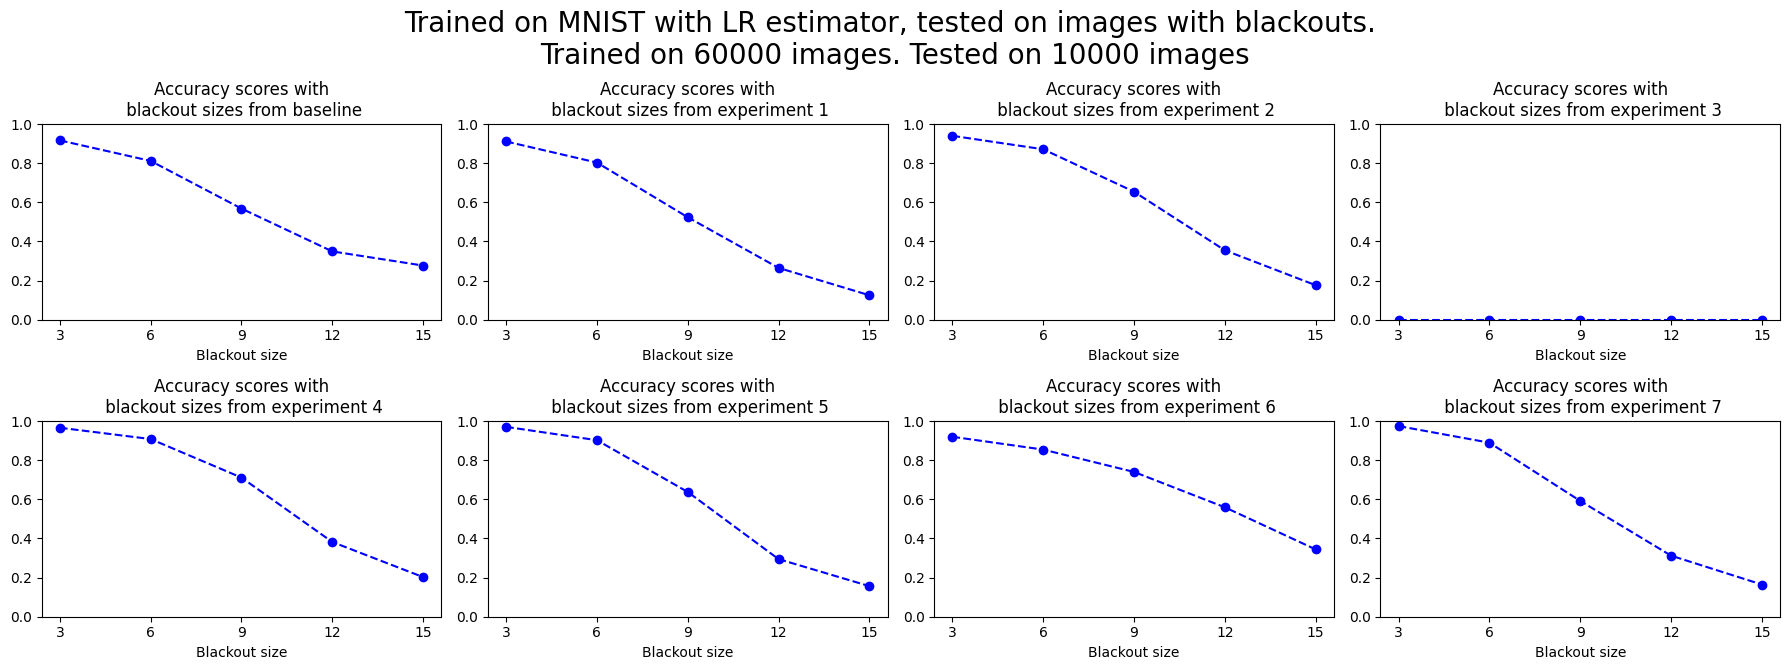

In [101]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(8):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in blackout_sizes], scores_blackout_lr[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n blackout sizes from experiment {i}" if i > 0 else "Accuracy scores with\n blackout sizes from baseline")
    ax[k][j].set_ylim([.0, 1.])
    ax[k][j].set_xlabel("Blackout size") 
fig.tight_layout(rect=(0., 0.03, 1., 0.9))
fig.suptitle(f"Trained on MNIST with LR estimator, tested on images with blackouts. \nTrained on {data_train.shape[0]} images. Tested on {data_test.shape[0]} images",
             fontsize=20)
#fig.delaxes(ax[1,3])

### SVM

In [67]:
scores_blackout_svm = []

#### Baseline - SVM

In [68]:
clfs_svm_blackout_bl = [SVC(kernel='rbf', C=svm_best_Cs["baseline"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_baseline_svm = score_clfs_noisy(clfs_svm_blackout_bl, train_flattened, train_labels, blackout_test_flattened, test_labels)
scores_blackout_svm.append(scores_blackout_baseline_svm)
scores_blackout_baseline_svm

[0.9572, 0.8588, 0.6328, 0.4091, 0.278]

#### Experiment 1 - SVM

In [69]:
clfs_svm_exp1_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp1"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_exp1_svm = score_clfs_noisy(clfs_svm_exp1_blackout, exp_1_train_transformed, train_labels, exp_1_test_blackout_transformed, test_labels)
scores_blackout_svm.append(scores_blackout_exp1_svm)

#### Experiment 2 - SVM

In [70]:
clfs_svm_exp2_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp2"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_exp2_svm = score_clfs_noisy(clfs_svm_exp2_blackout, exp_2_train_transformed, train_labels, exp_2_test_blackout_transformed, test_labels)
scores_blackout_svm.append(scores_blackout_exp2_svm)
scores_blackout_exp2_svm

[0.9657, 0.8887, 0.6711, 0.3814, 0.2184]

#### Experiment 3 - SVM

In [71]:
""" clfs_svm_exp3_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp3"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_svm.append(score_clfs_noisy(clfs_svm_exp3_blackout, dataset_exp3_blackout)) """
scores_blackout_svm.append([0.0 for _ in range(len(blackout_sizes))])

#### Experiment 4 - SVM

In [72]:
clfs_svm_exp4_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp4"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_exp4_svm = score_clfs_noisy(clfs_svm_exp4_blackout, exp_4_train_transformed, train_labels, exp_4_test_blackout_transformed, test_labels)
scores_blackout_svm.append(scores_blackout_exp4_svm)
scores_blackout_exp4_svm

[0.9779, 0.9068, 0.664, 0.367, 0.2064]

#### Experiment 5 - SVM

In [73]:
clfs_svm_exp5_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp5"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_exp5_svm = score_clfs_noisy(clfs_svm_exp5_blackout, exp_5_train_transformed, train_labels, exp_5_test_blackout_transformed, test_labels)
scores_blackout_svm.append(scores_blackout_exp5_svm)
scores_blackout_exp5_svm

[0.9807, 0.8974, 0.6254, 0.334, 0.1666]

#### Experiment 6 - SVM

In [74]:
clfs_svm_exp6_blackout = [SVC(kernel='rbf', C=svm_best_Cs["exp6"], gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_exp6_svm = score_clfs_noisy(clfs_svm_exp6_blackout, exp_6_train_transformed, train_labels, exp_6_test_blackout_transformed, test_labels)
scores_blackout_svm.append(scores_blackout_exp6_svm)
scores_blackout_exp6_svm

[0.9374, 0.8678, 0.7556, 0.5801, 0.368]

#### Experiment 7 - SVM

In [75]:
clfs_svm_exp7_blackout = [SVC(kernel='rbf', C=500., gamma="auto") for _ in range(len(blackout_sizes))]
scores_blackout_exp7_svm = score_clfs_noisy(clfs_svm_exp7_blackout, exp_7_train_transformed, train_labels, exp_7_test_blackout_transformed, test_labels)
scores_blackout_svm.append(scores_blackout_exp7_svm)
scores_blackout_exp7_svm

[0.9828, 0.8831, 0.576, 0.3144, 0.2166]

### Results - SVM

Text(0.5, 0.98, 'Trained on MNIST with SVM estimator, tested images with blackouts. \nTrained on 60000 images. Tested on 10000 images')

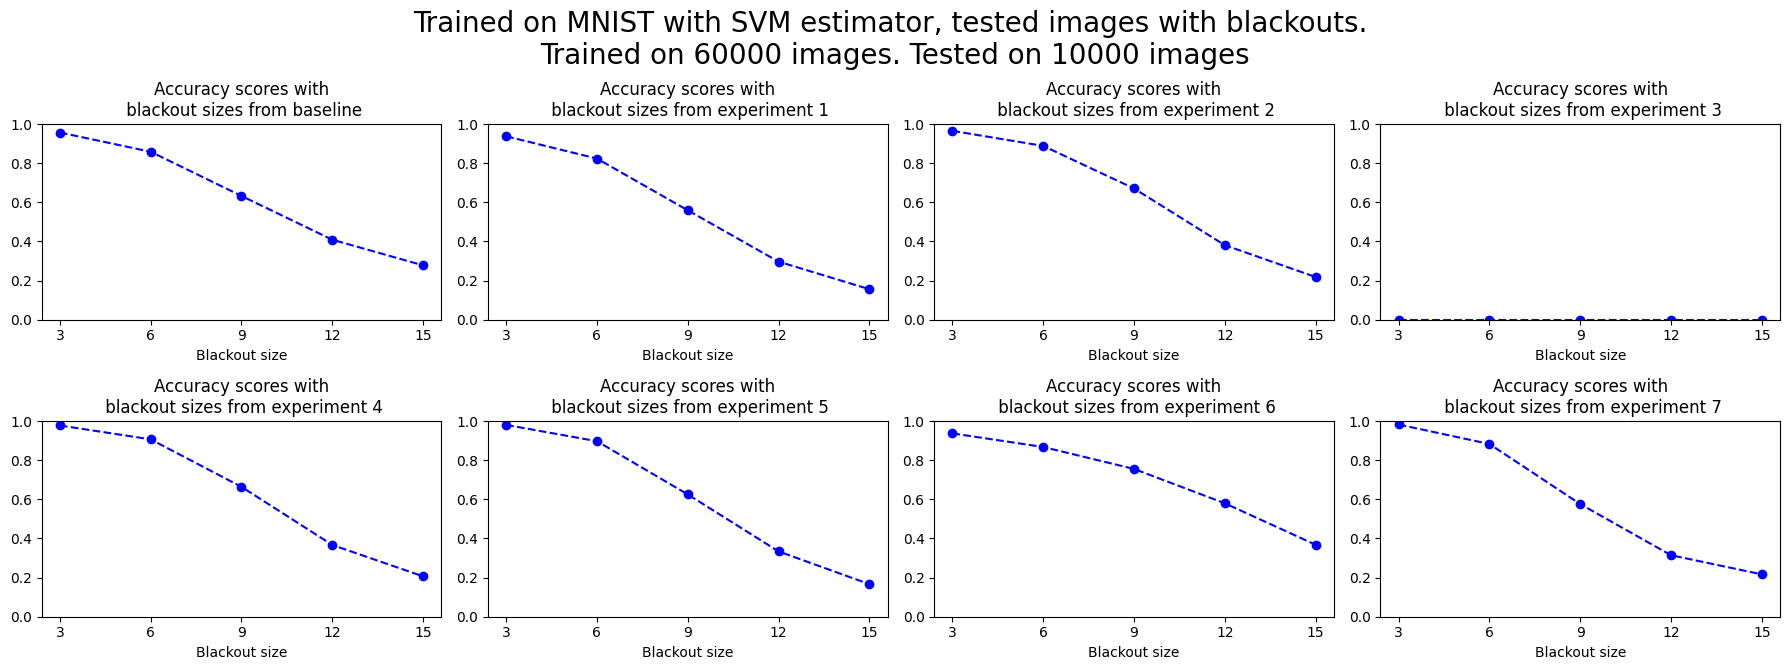

In [100]:
fig, ax = plt.subplots(2, 4, figsize=(18, 7))
for i in range(8):
    k, j = i // 4, i % 4
    ax[k][j].plot([str(t) for t in blackout_sizes], scores_blackout_svm[i], linestyle='--', marker='o', color='b', label='Accuracy score')
    ax[k][j].set_title(f"Accuracy scores with\n blackout sizes from experiment {i}" if i > 0 else "Accuracy scores with\n blackout sizes from baseline")
    ax[k][j].set_ylim([.0, 1.])
    ax[k][j].set_xlabel("Blackout size") 
fig.tight_layout(rect=(0., 0.03, 1., 0.9))
fig.suptitle(f"Trained on MNIST with SVM estimator, tested images with blackouts. \nTrained on {data_train.shape[0]} images. Tested on {data_test.shape[0]} images",
             fontsize=20)
#fig.delaxes(ax[1,3])

### Testing with CNN - Baseline

In [77]:
cnn_blackout_scores_noise = []

In [96]:
def score_cnn_bl(clfs, X_train, y_train, X_test, y_test):
    scores = []
    batch_size = 128
    epochs = 15
    X_tr = np.array(X_train)

    for i, clf in enumerate(clfs):
        X_te = np.array([black_out_section(img, blackout_sizes[i]) for img in X_test])
        clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        clf.fit(X_tr, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
        scores.append(clf.evaluate(X_te, y_test, verbose=0)[1])
    return scores

In [97]:
clfs_blackout_bl_cnn = [make_model_baseline(input_shape=input_shape, num_classes=classes) for _ in range(len(blackout_sizes))]
cnn_blackout_scores_noise.append(score_cnn_bl(clfs_blackout_bl_cnn, mnist_train_pixelshape, train_labels_binary, mnist_test_pixelshape, test_labels_binary))

Text(0.5, 1.0, 'CNN accuracy scores with blackout sizes from baseline, SVM')

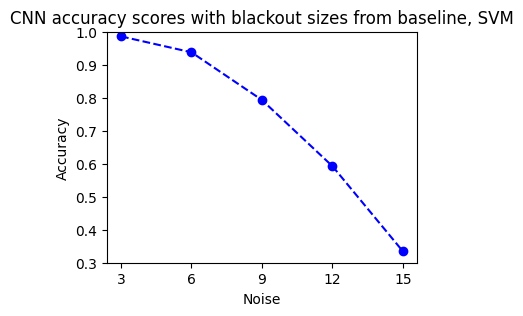

In [99]:
plt.plot([str(t) for t in blackout_sizes], cnn_blackout_scores_noise[0], linestyle='--', marker='o', color='b', label='Accuracy score')
plt.ylim([.3, 1.])
plt.ylabel("Accuracy")
plt.xlabel("Noise")
plt.title("CNN accuracy scores with blackout sizes from baseline, SVM")